In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl



In [ ]:
url1='https://raw.githubusercontent.com/Abhinav0057/test/master/merolagani.csv'
url2='https://raw.githubusercontent.com/Abhinav0057/test/master/Book1.csv'

In [ ]:
df1 = pd.read_csv(url1)
df1.head()

,S.N.,Date,Index,Absolute Change,Percentage Change
0,1,2019/05/28,"1,305.49",2.53,0.1945%
1,2,2019/05/27,"1,302.96",0.34,0.0262%
2,3,2019/05/26,"1,302.61",-11.93,-0.9077%
3,4,2019/05/23,"1,314.55",-5.08,-0.3853%
4,5,2019/05/22,"1,319.63",7.49,0.571%


In [ ]:
df2 = pd.read_csv(url2,names=['S.N.','Date','Index','Absolute Change','Percentage Change'])
df2.head()

,S.N.,Date,Index,Absolute Change,Percentage Change
0,1,7/13/2021,"2,871.04",16.34,0.57%
1,2,7/12/2021,"2,854.77",-45.06,-1.55%
2,3,7/11/2021,"2,899.82",74.71,2.64%
3,4,7/8/2021,"2,824.90",23.76,0.85%
4,5,7/7/2021,"2,801.13",-16.97,-0.60%


In [ ]:
#a=df1.head(0)
#b=df2.head(0)
print(df1.columns.intersection(df2.columns))
print("Okay we have the same headers now lets commbine and remoe the same data")

Index(['S.N.', 'Date', 'Index', 'Absolute Change', 'Percentage Change'], dtype='object')
Okay we have the same headers now lets commbine and remoe the same data


In [ ]:
df2.describe()

,S.N.,Absolute Change
count,500.000000,500.000000
mean,250.500000,3.606500
std,144.481833,26.501208
min,1.000000,-123.340000
25%,125.750000,-6.527500
50%,250.500000,1.620000
75%,375.250000,14.182500
max,500.000000,95.460000


In [ ]:
#df1['S.N.']=df1['S.N.']+500
#only run this once or else it shall be more than 500+
if df1['S.N.'][0]==1:
  df1['S.N.']=df1['S.N.']+500
df1['S.N.'].head()


0    501
1    502
2    503
3    504
4    505
Name: S.N., dtype: int64

In [ ]:
df1['Date'].head()

0    2019/05/28
1    2019/05/27
2    2019/05/26
3    2019/05/23
4    2019/05/22
Name: Date, dtype: object

In [ ]:
df1['Date']=pd.to_datetime(df1['Date'],format='%Y/%m/%d')
df1['Date'].head()

0   2019-05-28
1   2019-05-27
2   2019-05-26
3   2019-05-23
4   2019-05-22
Name: Date, dtype: datetime64[ns]

In [ ]:
df2['Date']=pd.to_datetime(df2['Date'])
df2['Date'].head()

0   2021-07-13
1   2021-07-12
2   2021-07-11
3   2021-07-08
4   2021-07-07
Name: Date, dtype: datetime64[ns]

In [ ]:
#changing df1 date to meet same structure as df2 Date

In [ ]:
df1['S.N.'].head()

0    501
1    502
2    503
3    504
4    505
Name: S.N., dtype: int64

In [ ]:
ourFrames=[df2,df1]

In [ ]:
resultdf = pd.concat(ourFrames)
resultdf.head()

,S.N.,Date,Index,Absolute Change,Percentage Change
0,1,2021-07-13,"2,871.04",16.34,0.57%
1,2,2021-07-12,"2,854.77",-45.06,-1.55%
2,3,2021-07-11,"2,899.82",74.71,2.64%
3,4,2021-07-08,"2,824.90",23.76,0.85%
4,5,2021-07-07,"2,801.13",-16.97,-0.60%


In [ ]:
resultdf.tail()

,S.N.,Date,Index,Absolute Change,Percentage Change
1218,1719,2014-02-06,785.78,4.40,0.56%
1219,1720,2014-02-05,781.38,6.47,0.83%
1220,1721,2014-02-04,774.91,5.40,0.7%
1221,1722,2014-02-03,769.51,-6.41,-0.83%
1222,1723,2014-02-02,775.92,-5.54,-0.7%


In [ ]:
resultdf.isna().sum()

S.N.                 0
Date                 0
Index                0
Absolute Change      0
Percentage Change    0
dtype: int64

In [ ]:
resultdf.describe()

,S.N.,Absolute Change
count,1723.000000,1723.000000
mean,862.000000,1.395119
std,497.531574,19.067584
min,1.000000,-123.340000
25%,431.500000,-6.690000
50%,862.000000,0.030000
75%,1292.500000,8.585000
max,1723.000000,95.460000


In [ ]:
resultdf=resultdf.drop_duplicates(subset=['Date'])
resultdf.describe()

,S.N.,Absolute Change
count,1680.000000,1680.000000
mean,870.702381,1.333571
std,500.836234,19.234302
min,1.000000,-123.340000
25%,420.750000,-6.812500
50%,883.500000,0.000000
75%,1303.250000,8.582500
max,1723.000000,95.460000


In [ ]:
resultdf['Index'] = (resultdf['Index'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
print(' resultdf will be our working df ')


 resultdf will be our working df 


In [ ]:

resultdf['Index']=resultdf['Index'].astype(float)
resultdf.describe()

,S.N.,Index,Absolute Change
count,1680.000000,1680.000000,1680.000000
mean,870.702381,1386.600952,1.333571
std,500.836234,450.627036,19.234302
min,1.000000,754.990000,-123.340000
25%,420.750000,1131.782500,-6.812500
50%,883.500000,1274.915000,0.000000
75%,1303.250000,1549.702500,8.582500
max,1723.000000,3025.830000,95.460000


In [ ]:
resultdf.set_index("Date", drop=False, inplace=True)
df=resultdf




#df.pop('Percentage Change')
df

,S.N.,Date,Index,Absolute Change,Percentage Change
Date,,,,,
2021-07-13,1,2021-07-13,2871.04,16.34,0.57%
2021-07-12,2,2021-07-12,2854.77,-45.06,-1.55%
2021-07-11,3,2021-07-11,2899.82,74.71,2.64%
2021-07-08,4,2021-07-08,2824.90,23.76,0.85%
2021-07-07,5,2021-07-07,2801.13,-16.97,-0.60%
...,...,...,...,...,...
2014-02-06,1719,2014-02-06,785.78,4.40,0.56%
2014-02-05,1720,2014-02-05,781.38,6.47,0.83%
2014-02-04,1721,2014-02-04,774.91,5.40,0.7%


(1680, 5)

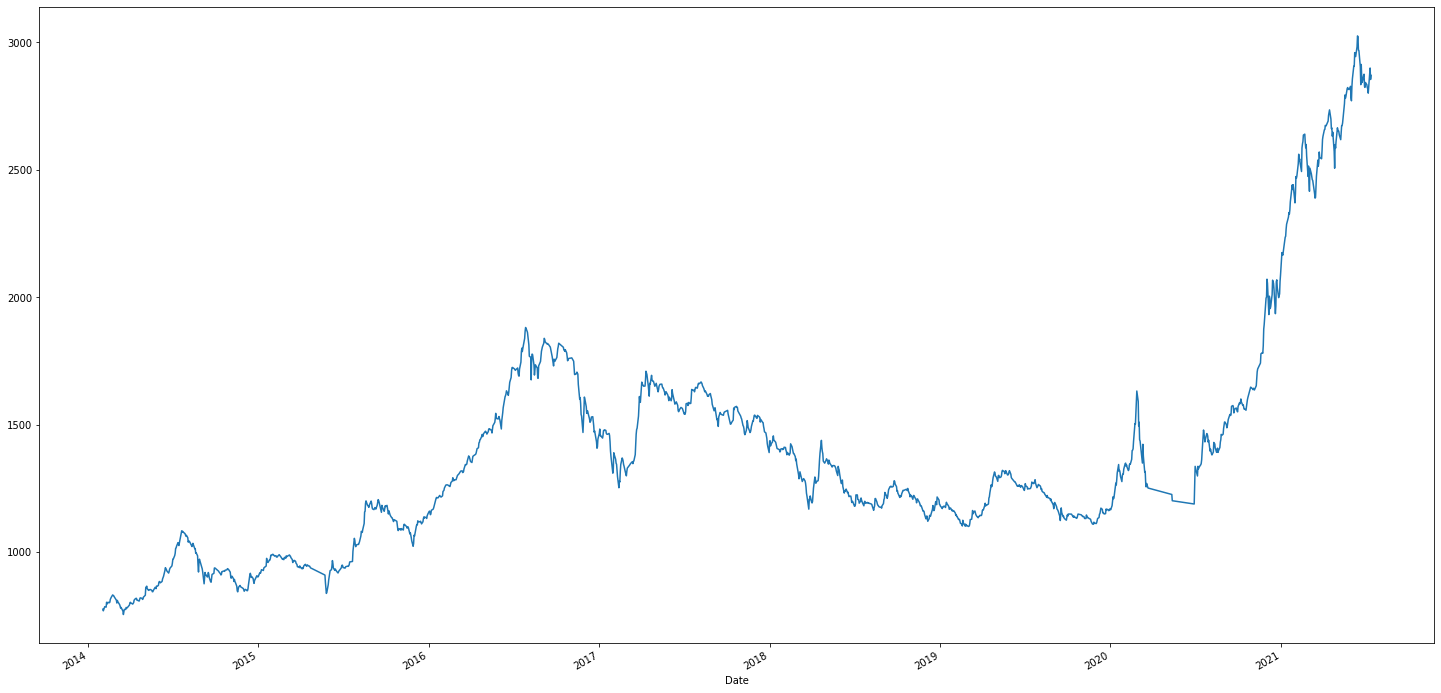

In [ ]:
df.Index.plot(figsize=(25, 13))
df.shape

**Arima Model**


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


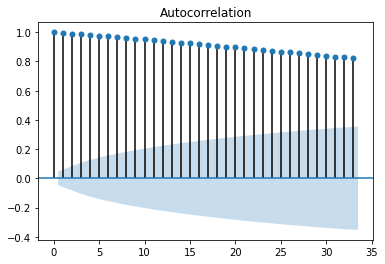

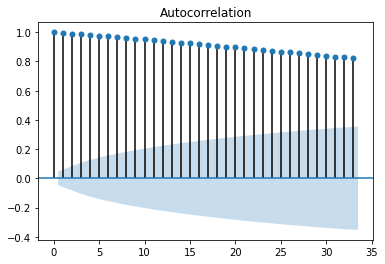

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Index'])

Since the graph is not stationary changing it to stationary 

In [ ]:


df.pop('Percentage Change')
df.pop('Absolute Change')
df.pop('S.N.')
df.pop('Date')

Date
2021-07-13   2021-07-13
2021-07-12   2021-07-12
2021-07-11   2021-07-11
2021-07-08   2021-07-08
2021-07-07   2021-07-07
                ...    
2014-02-06   2014-02-06
2014-02-05   2014-02-05
2014-02-04   2014-02-04
2014-02-03   2014-02-03
2014-02-02   2014-02-02
Name: Date, Length: 1680, dtype: datetime64[ns]

In [ ]:
df

,Index
Date,
2021-07-13,2871.04
2021-07-12,2854.77
2021-07-11,2899.82
2021-07-08,2824.90
2021-07-07,2801.13
...,...
2014-02-06,785.78
2014-02-05,781.38
2014-02-04,774.91


In [ ]:
df.to_csv('df.csv')

In [ ]:
!ls


df.csv	sample_data


In [ ]:
!cat df.csv

Date,Index
2021-07-13,2871.04
2021-07-12,2854.77
2021-07-11,2899.82
2021-07-08,2824.9
2021-07-07,2801.13
2021-07-06,2818.11
2021-07-05,2822.74
2021-07-04,2834.52
2021-07-01,2843.0
2021-06-30,2823.88
2021-06-29,2828.01
2021-06-28,2875.5
2021-06-27,2870.38
2021-06-24,2843.0
2021-06-23,2862.19
2021-06-22,2913.85
2021-06-21,2834.41
2021-06-20,2905.15
2021-06-17,2968.43
2021-06-16,2969.7
2021-06-15,3022.11
2021-06-14,3025.83
2021-06-13,2983.11
2021-06-10,2944.78
2021-06-09,2946.58
2021-06-08,2960.14
2021-06-07,2906.7
2021-06-06,2906.89
2021-06-03,2856.68
2021-06-02,2827.13
2021-06-01,2771.15
2021-05-31,2782.69
2021-05-30,2827.93
2021-05-27,2815.4
2021-05-25,2816.57
2021-05-24,2823.07
2021-05-23,2820.0
2021-05-20,2787.19
2021-05-19,2780.81
2021-05-18,2793.9
2021-05-17,2759.22
2021-05-16,2738.3
2021-05-13,2684.01
2021-05-12,2673.88
2021-05-11,2673.32
2021-05-10,2645.85
2021-05-09,2618.57
2021-05-06,2637.13
2021-05-05,2649.6
2021-05-04,2654.69
2021-05-03,2652.76
2021-05-02,2665.11
2021-04-29,2